<a href="https://colab.research.google.com/github/RISA-source/Concepts_Of_AI-WorkSheets/blob/main/Workshop10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise-1

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
imdb_path = "/content/drive/MyDrive/IMDB Dataset.csv"
df = pd.read_csv(imdb_path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_review'] = df['review'].apply(preprocess_text)


In [7]:
X = df['clean_review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
vectorizer = CountVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [9]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)


MultinomialNB()

In [10]:
y_pred = nb_model.predict(X_test_vec)
y_prob = nb_model.predict_proba(X_test_vec)[:, 1]


In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8398

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      5000
           1       0.85      0.83      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[4238  762]
 [ 840 4160]]


ROC-AUC Score: 0.9081476800000001


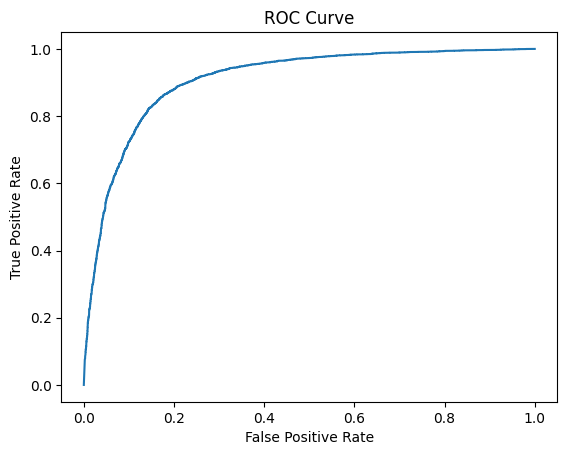

In [13]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


#Exercise-2

In [14]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)


In [16]:
breast_cancer_wisconsin_prognostic = fetch_ucirepo(id=16)

X = breast_cancer_wisconsin_prognostic.data.features
y = breast_cancer_wisconsin_prognostic.data.targets


In [17]:
X.head()
y.head()


,Outcome
0,N
1,N
2,N
3,N
4,R


In [18]:
X.describe()
X.isnull().sum()


,0
Time,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0


In [19]:
X = X.fillna(X.mean())


In [20]:
y = y.replace({'R': 1, 'N': 0}).values.ravel()


/tmp/ipython-input-3091471185.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'R': 1, 'N': 0}).values.ravel()


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
log_reg = LogisticRegression(max_iter=1000)

rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))


Selected Features: ['Time', 'smoothness1', 'texture2', 'perimeter2', 'concave_points2']


In [24]:
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe.ranking_
}).sort_values('Rank')

feature_ranking


,Feature,Rank
0,Time,1
5,smoothness1,1
12,texture2,1
13,perimeter2,1
18,concave_points2,1
6,compactness1,2
16,compactness2,3
17,concavity2,4
14,area2,5
21,radius3,6


In [25]:
X_train_sel = scaler.fit_transform(X_train[selected_features])
X_test_sel = scaler.transform(X_test[selected_features])

log_reg.fit(X_train_sel, y_train)


LogisticRegression(max_iter=1000)

In [26]:
y_pred_sel = log_reg.predict(X_test_sel)
y_prob_sel = log_reg.predict_proba(X_test_sel)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Precision:", precision_score(y_test, y_pred_sel))
print("Recall:", recall_score(y_test, y_pred_sel))
print("F1 Score:", f1_score(y_test, y_pred_sel))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_sel))


Accuracy: 0.75
Precision: 0.4
Recall: 0.2222222222222222
F1 Score: 0.2857142857142857
ROC-AUC: 0.7956989247311828


In [27]:
log_reg.fit(X_train_scaled, y_train)

y_pred_all = log_reg.predict(X_test_scaled)
y_prob_all = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Accuracy (All Features):", accuracy_score(y_test, y_pred_all))
print("ROC-AUC (All Features):", roc_auc_score(y_test, y_prob_all))


Accuracy (All Features): 0.85
ROC-AUC (All Features): 0.7956989247311828


In [28]:
for n_features in [3, 7]:
    rfe = RFE(log_reg, n_features_to_select=n_features)
    rfe.fit(X_train_scaled, y_train)

    selected = X.columns[rfe.support_]

    X_train_n = scaler.fit_transform(X_train[selected])
    X_test_n = scaler.transform(X_test[selected])

    log_reg.fit(X_train_n, y_train)
    y_pred_n = log_reg.predict(X_test_n)

    print(f"\nTop {n_features} Features:", list(selected))
    print("Accuracy:", accuracy_score(y_test, y_pred_n))



Top 3 Features: ['Time', 'perimeter2', 'concave_points2']
Accuracy: 0.775

Top 7 Features: ['Time', 'smoothness1', 'compactness1', 'texture2', 'perimeter2', 'compactness2', 'concave_points2']
Accuracy: 0.75
